In [1]:
import cvxpy as cvx
import numpy as np
import pandas as pd
import time
import project_tests
import project_helper

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)

In [1]:
import sys
!{sys.executable} -m pip install -r requirements.txt

  Using cached alphalens-0.3.2.tar.gz (18.9 MB)
  Using cached colour-0.1.5-py2.py3-none-any.whl (23 kB)
  Using cached cvxpy-1.0.3.tar.gz (880 kB)
  Using cached numpy-1.13.3-cp36-cp36m-manylinux1_x86_64.whl (17.0 MB)
  Using cached pytz-2017.3-py2.py3-none-any.whl (511 kB)
  Using cached scipy-1.0.0-cp36-cp36m-manylinux1_x86_64.whl (50.0 MB)
     |████████████████████████████████| 4.6 MB 6.1 MB/s eta 0:00:01
  Using cached zipline-1.2.0-cp36-cp36m-linux_x86_64.whl
     |████████████████████████████████| 11.5 MB 58.9 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 17.0 MB/s eta 0:00:01
     |████████████████████████████████| 106 kB 58.5 MB/s eta 0:00:01
  Using cached bcolz-0.12.1.tar.gz (622 kB)
  Using cached alembic-1.7.7-py3-none-any.whl (210 kB)


     |████████████████████████████████| 3.1 MB 25.0 MB/s eta 0:00:01
     |████████████████████████████████| 11.6 MB 23.0 MB/s eta 0:00:01
     |████████████████████████████████| 11.6 MB 58.1 MB/s eta 0:00:01
     |████████████████████████████████| 11.6 MB 18.0 MB/s eta 0:00:01
     |████████████████████████████████| 11.5 MB 27.7 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 16.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 25.9 MB/s eta 0:00:01
     |████████████████████████████████| 285 kB 60.3 MB/s eta 0:00:01
     |████████████████████████████████| 283 kB 8.2 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 25.8 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 21.2 MB/s eta 0:00:01
     |████████████████████████████████| 216 kB 19.3 MB/s eta 0:00:01
     |████████████████████████████████| 86 kB 5.6 MB/s  eta 0:00:01
  Created wheel for alphalens: filename=alphalens-0.3.2-py3-none-any.whl size=18881511 sha256=4fbe92

  Created wheel for fastcache: filename=fastcache-1.1.0-cp36-cp36m-linux_x86_64.whl size=45775 sha256=0ae4d8022a78c34fa9b8a2877346c8e77c9eaf45601f305dd2ed2c012717cfa3
  Stored in directory: /home/miku3090/.cache/pip/wheels/e5/04/07/8deac05af87ab0c90c44179cdcee614092573ec1a82256d656
Successfully built alphalens cvxpy fastcache
Failed to build bcolz
  Attempting uninstall: pytz
    Found existing installation: pytz 2023.3.post1
    Uninstalling pytz-2023.3.post1:
      Successfully uninstalled pytz-2023.3.post1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.4
    Uninstalling scipy-1.5.4:
      Successfully uninstalled scipy-1.5.4
  Attempting uninstall: tables
    Found existing installation: tables 3.7.0
    Uninstalling tables-3.7.0:
      Successfully uninstalled tables-3.7.0
    Running setup.py install for b

In [ ]:
!pip install zipline

  Using cached zipline-1.4.1.tar.gz (5.4 MB)
  Preparing metadata (setup.py) ... done
  Using cached Logbook-1.6.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (447 kB)
  Using cached click-8.1.7-py3-none-any.whl (97 kB)
  Using cached python-interface-1.6.1.tar.gz (19 kB)
  Preparing metadata (setup.py) ... done
  Using cached multipledispatch-1.0.0-py3-none-any.whl (12 kB)
  Using cached toolz-0.12.0-py3-none-any.whl (55 kB)
  Using cached pandas-0.22.0.tar.gz (11.3 MB)
  Installing build dependencies ... \

In [2]:
from zipline.data import bundles
import project_helper
import os 

In [3]:
os.environ['ZIPLINE_ROOT'] = os.path.join(os.getcwd(), 'data', 'project_4_eod')
os.environ['ZIPLINE_ROOT']

'/home/miku3090/Desktop/work_dir/Code/stock_fin/AI-for-Trading/Term 1/Projects/sdfProject - 4 - Alpha Research and Factor Modelling/data/project_4_eod'

In [5]:
ingest_func = bundles.csvdir.csvdir_equities(['daily'], project_helper.EOD_BUNDLE_NAME)
bundles.register(project_helper.EOD_BUNDLE_NAME, ingest_func)

print('Data Registered')

Data Registered


/home/miku3090/anaconda3/envs/ai_4_trading_pj4/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Overwriting bundle with name 'eod-quotemedia'
  


In [6]:
from zipline.pipeline import Pipeline
from zipline.pipeline.factors import AverageDollarVolume
from zipline.utils.calendars import get_calendar


universe = AverageDollarVolume(window_length=120).top(500) 
trading_calendar = get_calendar('NYSE') 
bundle_data = bundles.load(project_helper.EOD_BUNDLE_NAME)
engine = project_helper.build_pipeline_engine(bundle_data, trading_calendar)

In [7]:
universe_end_date = pd.Timestamp('2016-01-05', tz='UTC')

universe_tickers = engine\
    .run_pipeline(
        Pipeline(screen=universe),
        universe_end_date,
        universe_end_date)\
    .index.get_level_values(1)\
    .values.tolist()
    
universe_tickers

[Equity(0 [A]),
 Equity(1 [AAL]),
 Equity(2 [AAP]),
 Equity(3 [AAPL]),
 Equity(4 [ABBV]),
 Equity(5 [ABC]),
 Equity(6 [ABT]),
 Equity(7 [ACN]),
 Equity(8 [ADBE]),
 Equity(9 [ADI]),
 Equity(10 [ADM]),
 Equity(11 [ADP]),
 Equity(12 [ADS]),
 Equity(13 [ADSK]),
 Equity(14 [AEE]),
 Equity(15 [AEP]),
 Equity(16 [AES]),
 Equity(17 [AET]),
 Equity(18 [AFL]),
 Equity(19 [AGN]),
 Equity(20 [AIG]),
 Equity(21 [AIV]),
 Equity(22 [AIZ]),
 Equity(23 [AJG]),
 Equity(24 [AKAM]),
 Equity(25 [ALB]),
 Equity(26 [ALGN]),
 Equity(27 [ALK]),
 Equity(28 [ALL]),
 Equity(29 [ALLE]),
 Equity(30 [ALXN]),
 Equity(31 [AMAT]),
 Equity(32 [AMD]),
 Equity(33 [AME]),
 Equity(34 [AMG]),
 Equity(35 [AMGN]),
 Equity(36 [AMP]),
 Equity(37 [AMT]),
 Equity(38 [AMZN]),
 Equity(39 [ANDV]),
 Equity(40 [ANSS]),
 Equity(41 [ANTM]),
 Equity(42 [AON]),
 Equity(43 [AOS]),
 Equity(44 [APA]),
 Equity(45 [APC]),
 Equity(46 [APD]),
 Equity(47 [APH]),
 Equity(48 [ARE]),
 Equity(49 [ARNC]),
 Equity(50 [ATVI]),
 Equity(51 [AVB]),
 Equity(

In [10]:
from zipline.data.data_portal import DataPortal


data_portal = DataPortal(
    bundle_data.asset_finder,
    trading_calendar=trading_calendar,
    first_trading_day=bundle_data.equity_daily_bar_reader.first_trading_day,
    equity_minute_reader=None,
    equity_daily_reader=bundle_data.equity_daily_bar_reader,
    adjustment_reader=bundle_data.adjustment_reader)

def get_pricing(data_portal, trading_calendar, assets, start_date, end_date, field='close'):
    end_dt = pd.Timestamp(end_date.strftime('%Y-%m-%d'), tz='UTC', offset='C')
    start_dt = pd.Timestamp(start_date.strftime('%Y-%m-%d'), tz='UTC', offset='C')

    end_loc = trading_calendar.closes.index.get_loc(end_dt)
    start_loc = trading_calendar.closes.index.get_loc(start_dt)

    return data_portal.get_history_window(
        assets=assets,
        end_dt=end_dt,
        bar_count=end_loc - start_loc,
        frequency='1d',
        field=field,
        data_frequency='daily')

In [11]:
five_year_returns = \
    get_pricing(
        data_portal,
        trading_calendar,
        universe_tickers,
        universe_end_date - pd.DateOffset(years=5),
        universe_end_date)\
    .pct_change()[1:].fillna(0)

five_year_returns.head()

,Equity(0 [A]),Equity(1 [AAL]),Equity(2 [AAP]),Equity(3 [AAPL]),Equity(4 [ABBV]),Equity(5 [ABC]),Equity(6 [ABT]),Equity(7 [ACN]),Equity(8 [ADBE]),Equity(9 [ADI]),...,Equity(481 [XL]),Equity(482 [XLNX]),Equity(483 [XOM]),Equity(484 [XRAY]),Equity(485 [XRX]),Equity(486 [XYL]),Equity(487 [YUM]),Equity(488 [ZBH]),Equity(489 [ZION]),Equity(490 [ZTS])
2011-01-07 00:00:00+00:00,0.00843652,0.01423027,0.02670202,0.00714639,0.00000000,0.00199434,0.00416541,0.00164769,-0.00712736,-0.00581846,...,-0.00183775,-0.00561865,0.00546091,-0.00404361,-0.01395259,0.00000000,0.01245693,-0.00018145,-0.01045802,0.00000000
2011-01-10 00:00:00+00:00,-0.00417428,0.00619534,0.00743543,0.01885158,0.00000000,-0.00571429,-0.00889600,-0.00885384,0.02871411,0.00292626,...,0.00094687,0.00781438,-0.00608100,0.01046585,0.00973303,0.00000000,0.00143979,0.00778351,-0.01794496,0.00000000
2011-01-11 00:00:00+00:00,-0.00188630,-0.04364361,-0.00592730,-0.00236744,0.00000000,0.00978303,-0.00206747,0.01371668,0.00060680,0.00875316,...,0.00131385,0.01017933,0.00744242,0.00735141,0.00611644,0.00000000,-0.00646974,0.03567570,0.00746728,0.00000000
2011-01-12 00:00:00+00:00,0.01725375,-0.00823708,0.01338721,0.00813289,0.00000000,-0.00597922,-0.00101061,0.02296913,0.01795027,0.00025710,...,0.00498609,0.01566621,0.01176334,0.02718194,0.00438630,0.00000000,0.00263106,0.01474083,-0.01190269,0.00000000
2011-01-13 00:00:00+00:00,-0.00455851,0.00095465,0.00303109,0.00365656,0.00000000,0.01492537,-0.00445119,-0.00040011,-0.00571905,-0.00501221,...,0.03049927,-0.00321668,0.00169383,0.00054651,-0.01823475,0.00000000,-0.00508430,-0.00466453,-0.00917796,0.00000000


In [22]:
five_year_returns.shape # 1256 time stamps * 490 stocks


(1256, 490)

In [23]:
# pca
from sklearn.decomposition import PCA


def fit_pca(returns, num_factor_exposures, svd_solver):
    """
    Fit PCA model with returns.

    Parameters
    ----------
    returns : DataFrame
        Returns for each ticker and date
    num_factor_exposures : int
        Number of factors for PCA
    svd_solver: str
        The solver to use for the PCA model

    Returns
    -------
    pca : PCA
        Model fit to returns
    """
    #TODO: Implement function
    pca = PCA(n_components=num_factor_exposures, svd_solver=svd_solver)
    pca.fit(returns)
    
    return pca


project_tests.test_fit_pca(fit_pca)

Tests Passed


In [24]:
num_factor_exposures = 20
pca = fit_pca(five_year_returns, num_factor_exposures, 'full')

pca.components_

array([[-0.04316847, -0.05874471, -0.03433256, ..., -0.03843904,
        -0.06092493, -0.01367163],
       [ 0.01955111,  0.19637679,  0.03451503, ...,  0.01749339,
        -0.01044197,  0.01892192],
       [-0.00993375,  0.07868756,  0.01133839, ..., -0.0157519 ,
         0.01261759,  0.01867875],
       ...,
       [-0.01174265,  0.01398085,  0.05143999, ...,  0.04125323,
         0.0035229 ,  0.03682367],
       [ 0.00526925, -0.04680674,  0.05716915, ...,  0.00671842,
        -0.02193923,  0.00833979],
       [-0.00535269, -0.01599057,  0.08414961, ..., -0.01540844,
         0.02188794,  0.01500221]])

In [26]:
pca.components_.shape # it seems compress the timestamp info

(20, 490)

<BarContainer object of 20 artists>

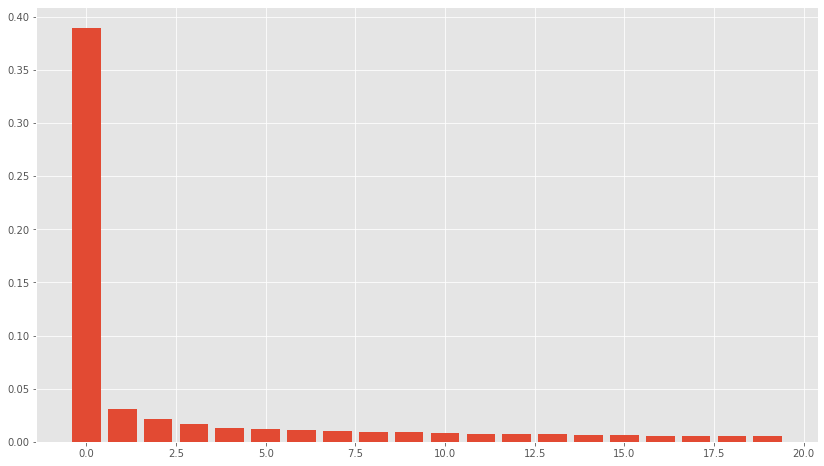

In [27]:
plt.bar(np.arange(num_factor_exposures), pca.explained_variance_ratio_)